# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)
RANDOM = 42

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>


In [2]:
print("Сиды фиксируем для того, чтобы можно было воспроизвести результат")

Сиды фиксируем для того, чтобы можно было воспроизвести результат


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# your code here
pd.concat((df_test.head(), df_test.tail()))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# your code here
df_train.describe(include=['object', 'float', 'int'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include=['object', 'float', 'int'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [9]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
# your code here
df_train.duplicated().sum()

985

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [11]:
# your code here
df_train[df_train.duplicated()].sort_values(by=['name','year','engine'], ascending=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
567,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
929,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
947,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
962,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
978,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [12]:
df_train.drop_duplicates(keep='first')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [13]:
col = df_train.drop(columns=['selling_price']).columns
col

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'],
      dtype='object')

In [14]:
df_train = df_train.drop_duplicates(subset=col, keep='first')

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
# your code here
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [18]:
df_train['mileage'].astype('str').apply(
        lambda x: x.split()[-1] if len(x.split()) > 0 else np.nan).value_counts()

kmpl     5577
nan       186
km/kg      77
Name: mileage, dtype: int64

In [19]:
df_train[df_train['mileage'].isna()].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


Плотность бензина [АИ-95]('https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D0%BD%D0%B7%D0%B8%D0%BD') варьируется в интерввале 725-780 кг/м³.

Возьмем близкое к среднему значению 750 кг/м³



In [20]:
def modify_mileage(series, koef=0.75):
    series = series.astype('str').apply(
            lambda x: x 
            if (x is np.nan 
                or 'km/kg' not in x.split() 
                or len(x.split()) < 2
               )
            else str(round(float(x.split()[0]) * koef)) + ' kmpl'               
    )
    return series            

In [21]:
df_train['mileage'] = modify_mileage(df_train['mileage'])

In [22]:
df_train['mileage'].astype('str').apply(
        lambda x: x.split()[-1] if len(x.split()) > 0 else np.nan).value_counts()

kmpl    5654
nan      186
Name: mileage, dtype: int64

### Modify 'mileage', 'engine', 'max_power'

In [23]:
def drop_units(series):
    series = series.astype('str').apply(
        lambda x: x.split()[0] 
        if len(x.split()) > 1 
        else np.nan
    ).astype('float')
    return series

In [24]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = drop_units(df_train[col])
    df_test[col] = drop_units(df_test[col])

In [25]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0


### Modify 'torque'

In [26]:
import re
def modify_torque(row):
    if row is np.nan:
        return (np.nan, np.nan)
    numbers = re.findall(r'([\d.,]+)', row.lower())
    units = re.findall(r'(nm|rpm|kgm)', row.lower())
    if 'kgm' in units:
        torque = round(float(numbers[0]) * 9.81, 2)
    else:
        torque = float(numbers[0])
    max_torque_rpm = float(numbers[-1].replace(',', ''))
    
    return torque, max_torque_rpm

In [27]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(modify_torque).to_list()
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.74,5.0,2750.0


In [28]:
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(modify_torque).to_list()
df_test.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172.0,5.0,4300.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



### Fillna

In [29]:
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         187
torque            187
seats             186
max_torque_rpm    187
dtype: int64

In [30]:
nan_cols = df_train.isna().sum()[df_train.isna().sum() != 0].index
nan_cols

Index(['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm'], dtype='object')

In [31]:
# your code here
df_train[nan_cols] = df_train[nan_cols].fillna(df_train[nan_cols].median())
df_train.isna().sum().sum()

0

In [32]:
df_test.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
torque            19
seats             19
max_torque_rpm    19
dtype: int64

In [33]:
df_test[nan_cols] = df_test[nan_cols].fillna(df_train[nan_cols].median())
df_test.isna().sum().sum()

0


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [34]:
print("Потому что количество сидений больше относится к категории автомобиля (купе, фулсайз, минивен, микроавтобус и тд.) и в таком случае если не перевести в категории, то может вводить в заблуждение модель ")

Потому что количество сидений больше относится к категории автомобиля (купе, фулсайз, минивен, микроавтобус и тд.) и в таком случае если не перевести в категории, то может вводить в заблуждение модель 


In [35]:
# your code here
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype('int')
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype('int')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int32  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int32  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int32(2), int64(3), object(5)
memory usage: 593.3+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

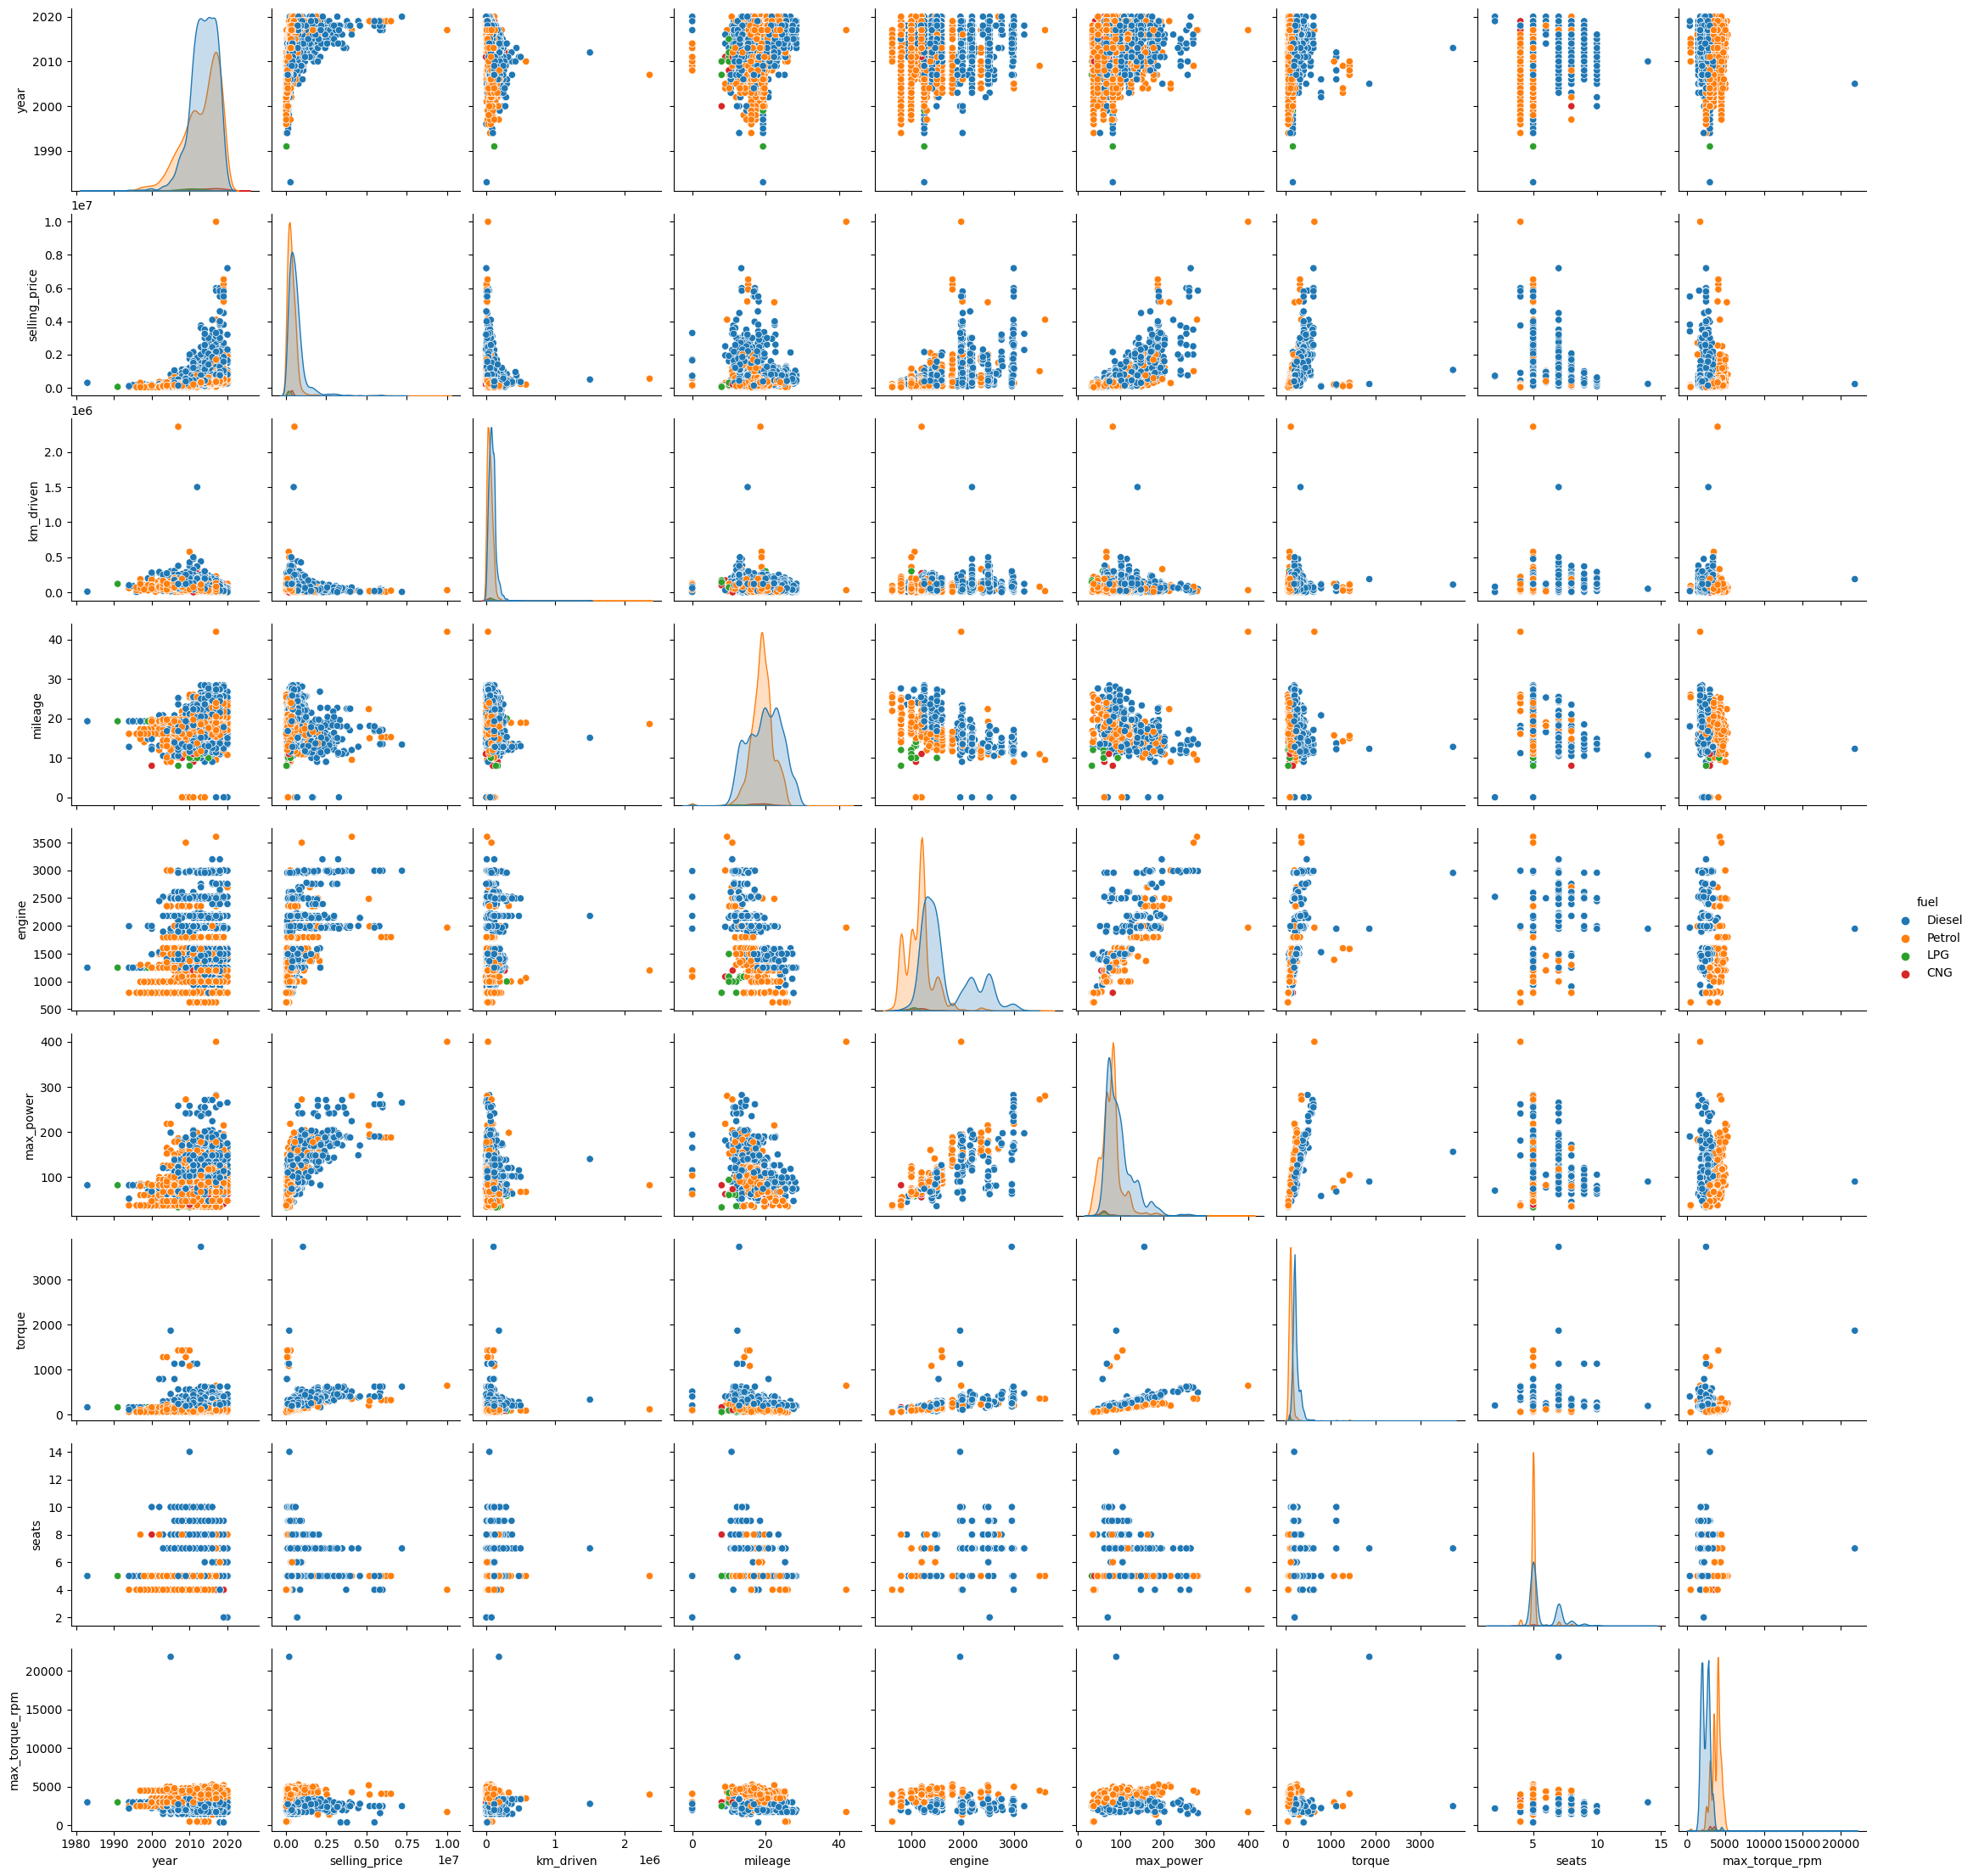

In [36]:
# your code here
sns.pairplot(df_train, hue='fuel')
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

На графиках видна слабо выраженная зависимость целевого признака от year, engine, torque и выраженная зависимость от признака max_power.

Также можно сказать что по этим признакам с целевым признаком есть положительная корреляция.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

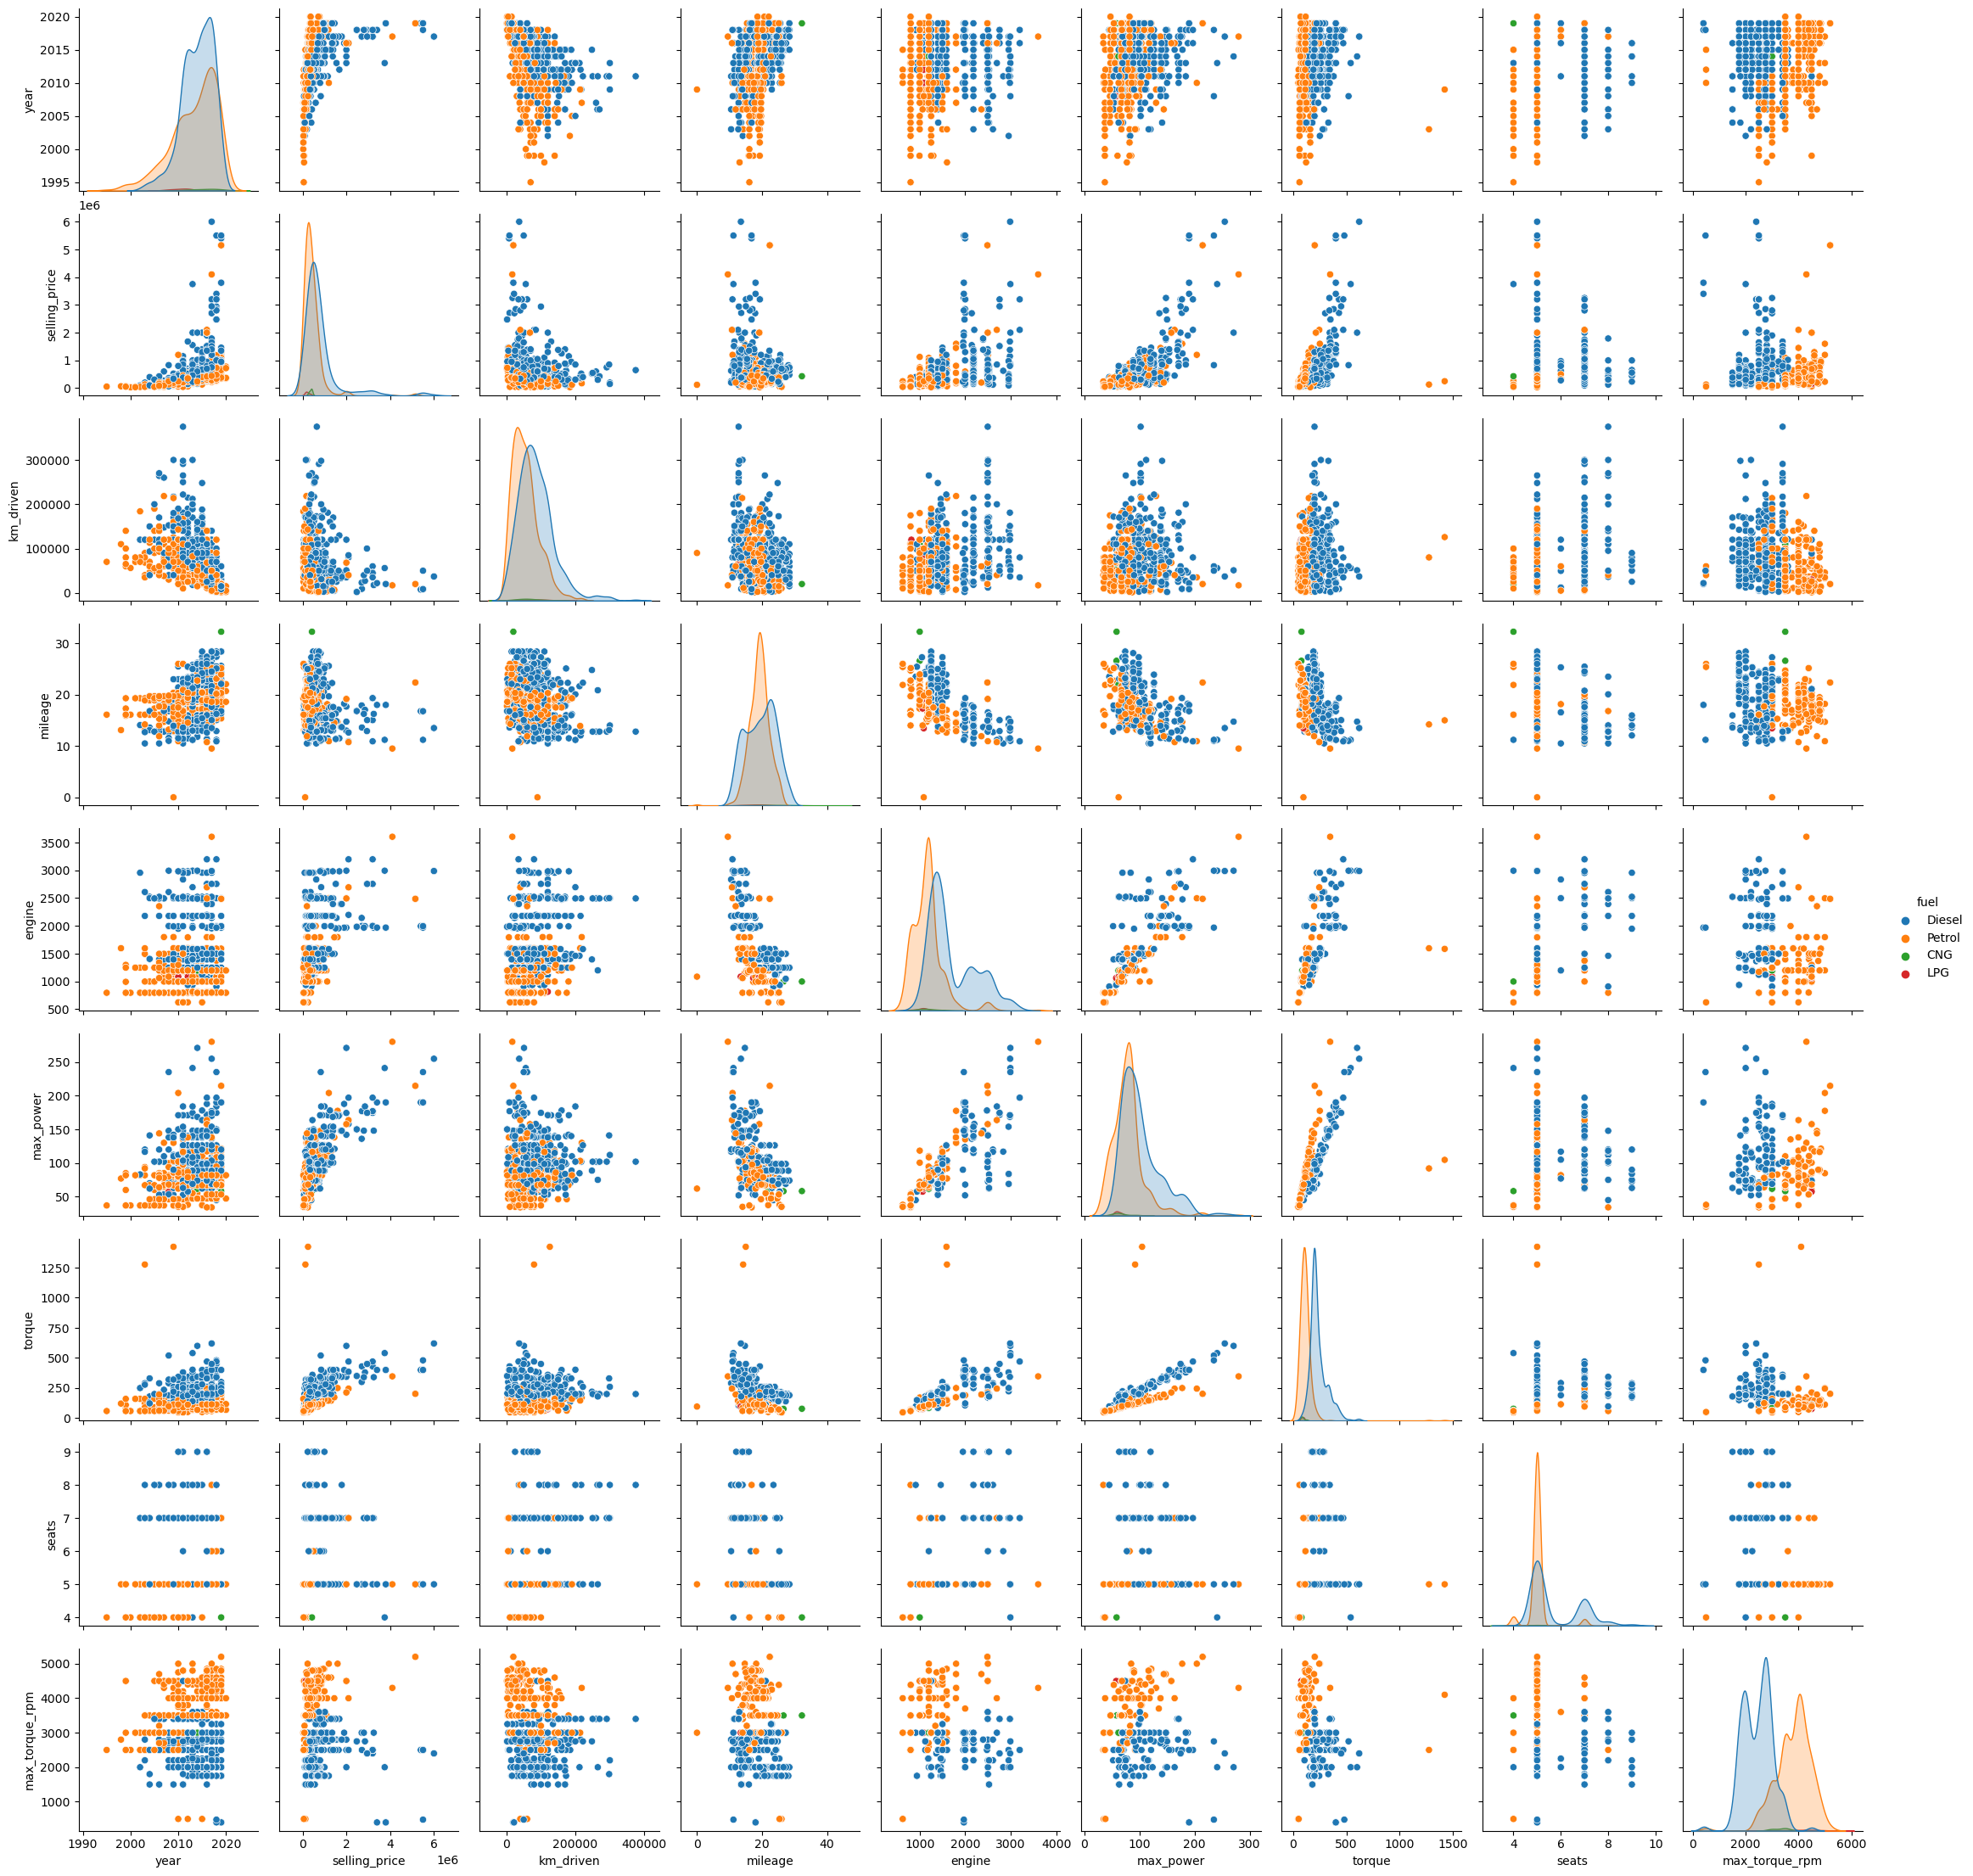

In [37]:
# your code here
sns.pairplot(df_test, hue='fuel')
plt.show()

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [38]:
num_cols = df_train.dtypes[df_train.dtypes != 'object'].index
num_cols

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm'],
      dtype='object')

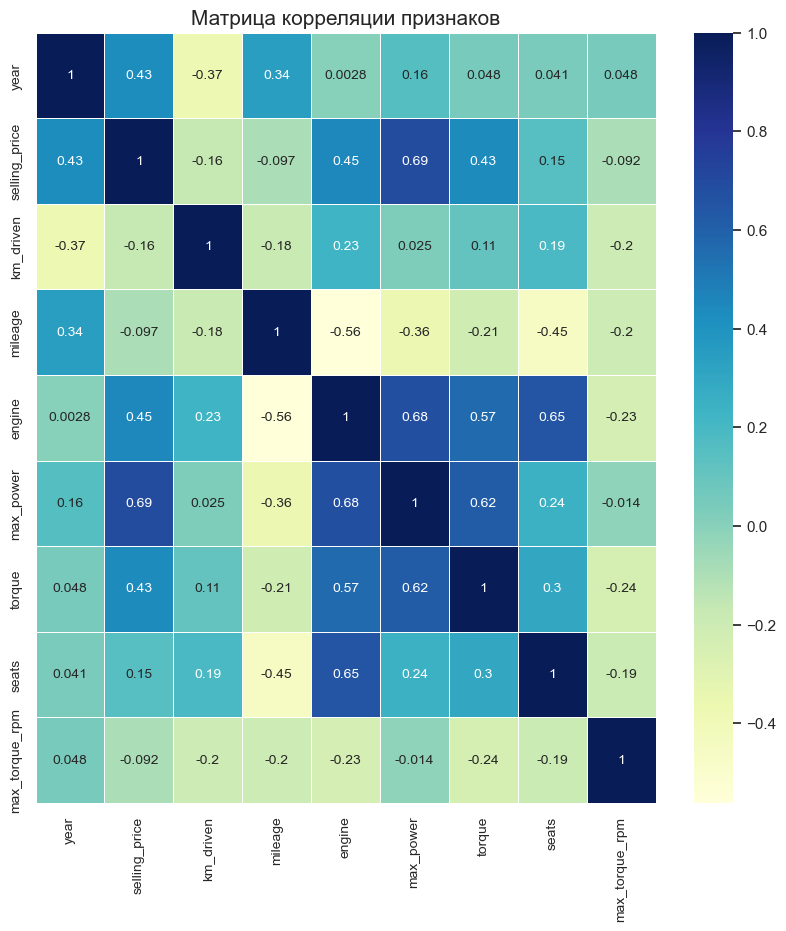

In [39]:
# your code here
sns.set(rc = {'figure.figsize':(10,10)})

crr = df_train[num_cols].corr()

sns.heatmap(crr, annot = True, cmap="YlGnBu", linecolor='white', linewidths=0.5, annot_kws={"fontsize":10})

plt.title('Матрица корреляции признаков', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [40]:
abs(df_train[num_cols].corr()).min().sort_values()

year              0.002819
engine            0.002819
max_power         0.014486
max_torque_rpm    0.014486
km_driven         0.024539
seats             0.041178
torque            0.048199
selling_price     0.092190
mileage           0.096627
dtype: float64

year и engine имеют наименьшую линейную зависимость между собой

In [41]:
df_train[num_cols].corr()[df_train[num_cols].corr() < 1].max().sort_values()

max_torque_rpm    0.047780
km_driven         0.229766
mileage           0.342609
year              0.427279
torque            0.617134
seats             0.652172
engine            0.681968
selling_price     0.693742
max_power         0.693742
dtype: float64

engine и max_power имеют наибольшую линейную зависимость между собой, если не считать линейную зависимость max_power и целевого признака.

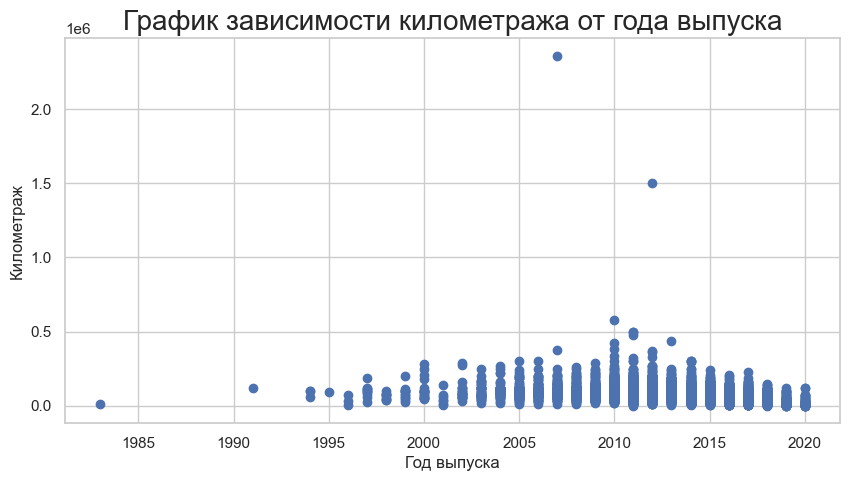

In [42]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set_style("whitegrid")

plt.scatter(df_train['year'], df_train['km_driven'])
plt.title('График зависимости километража от года выпуска', fontsize = 20)
plt.xlabel('Год выпуска')
plt.ylabel('Километраж')
plt.show()

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ:** Нет не правильно. График показывает, что старые автомобили имеют более высокий километраж. Скорей всего старые автомобили потому и на ходу до сих пор, что они используются не так активно.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

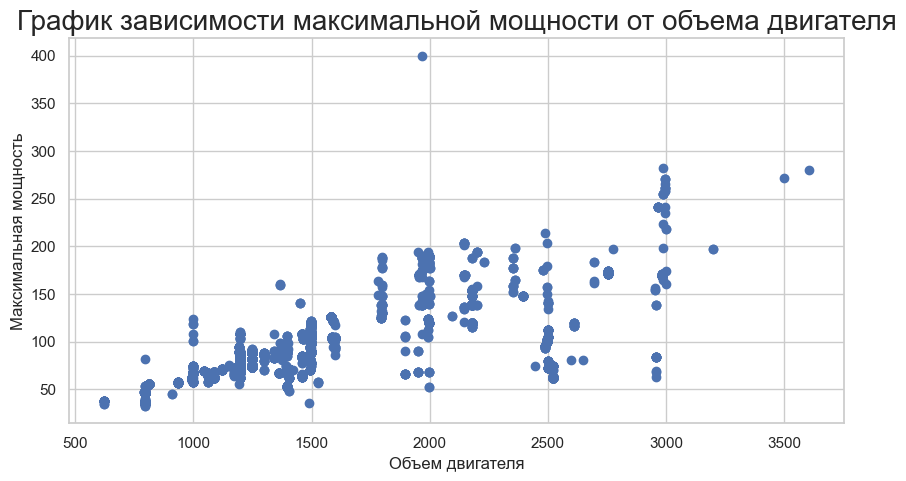

In [43]:
# your code here
plt.scatter(df_train['engine'], df_train['max_power'])
plt.title('График зависимости максимальной мощности от объема двигателя', fontsize = 20)
plt.xlabel('Объем двигателя')
plt.ylabel('Максимальная мощность')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

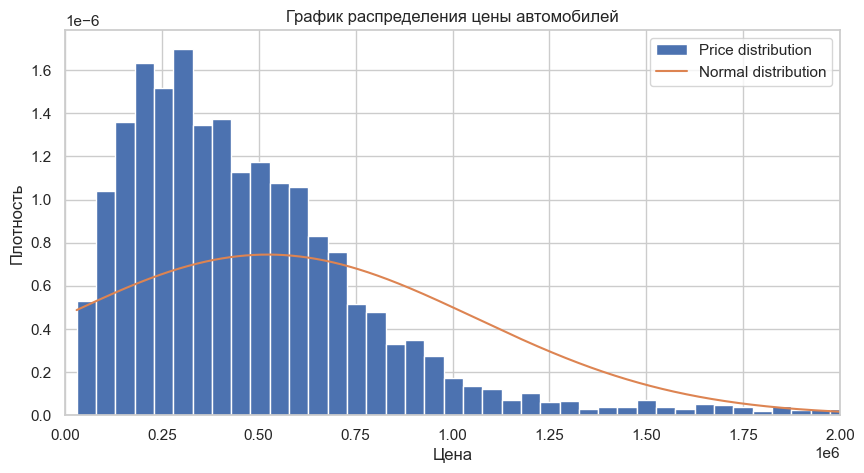

In [44]:
from scipy.stats import norm

point_min = df_train['selling_price'].describe()['min']
point_max = df_train['selling_price'].describe()['max']
point_count = df_train['selling_price'].describe()['count']
point_std = df_train['selling_price'].describe()['std']
point_mean = df_train['selling_price'].describe()['mean']

# plot distribution
df_train['selling_price'].hist(bins=200, density=True, label="Price distribution")

# plot normal distribution
x_axis = np.arange(point_min, point_max, 100)
plt.plot(x_axis, norm.pdf(x_axis,point_mean,point_std), label="Normal distribution")

plt.title('График распределения цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.legend()
plt.xlim([0,2000000])
plt.grid(all)
plt.show()

На графике видно, что целевой признак имеет не нормальное распределение со смещением влево и большим хвостом справа. Скорей всего линейные модели будут иметь низкую точность и возможно придется модифицировать целевой признак. Например логарифмировать. 

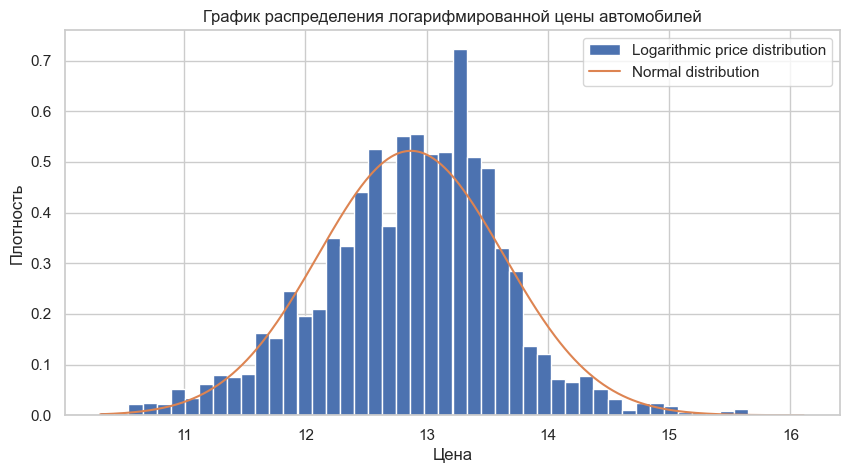

In [45]:
target_log = np.log(df_train['selling_price'])

point_min = target_log.describe()['min']
point_max = target_log.describe()['max']
point_count = target_log.describe()['count']
point_std = target_log.describe()['std']
point_mean = target_log.describe()['mean']

# plot distribution
target_log.hist(bins=50, density=True, label="Logarithmic price distribution")

# plot normal distribution
x_axis = np.arange(point_min, point_max, 0.01)
plt.plot(x_axis, norm.pdf(x_axis,point_mean,point_std), label="Normal distribution")

plt.title('График распределения логарифмированной цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.legend()
plt.grid(all)
plt.show()

После логарифмирования получаем более приближенное распределение к нормальному. 

In [46]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.74,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.82,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10,5,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00,5,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70,5,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.44,5,2750.0


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int32  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int32  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int32(2), int64(3), object(5)
memory usage: 593.3+ KB


In [48]:
cols_drop = list(df_train.dtypes[df_train.dtypes == 'object'].index)
cols_drop.append('selling_price')
cols_drop

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']

In [49]:
y_train = df_train['selling_price'] # your code here
X_train = df_train.drop(columns=cols_drop) # your code here
X_train.shape

(5840, 8)

In [50]:
# assert X_train.shape == (5840, 6)
# Закомментил, так как не удалял столбец torque

In [51]:
y_test = df_test['selling_price'] # your code here
X_test = df_test.drop(columns=cols_drop) # your code here
X_test.shape

(1000, 8)

In [52]:
# assert X_test.shape == (1000, 6)
# Закомментил, так как не удалял столбец torque

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score_r2 = r2_score(y_test, prediction)
score_mse = MSE(y_test, prediction)
score_r2, score_mse

(0.6065191452155565, 226184031427.12213)

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


### Save model

In [54]:
import os
import pickle
def save_model(model, file_name = 'default_model.pkl'):
    try:
        os.mkdir('models')
    except:
        pass
    file_path = os.path.join(os.getcwd(), 'models', file_name)
    pickle.dump(model, open(file_path, 'wb'))
#     print(f'Model {name} saved successfully')

### Load model

In [55]:
def load_model(file_name):
    file_path = os.path.join(os.getcwd(), 'models', file_name)
    return pickle.load(open(file_path, 'rb'))

In [56]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
save_model(scaler, 'scaler_model.pkl')

scaler = load_model('scaler_model.pkl')

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
prediction = model.predict(X_test_scaled)
score_r2 = r2_score(y_test, prediction)
score_mse = MSE(y_test, prediction)
score_r2, score_mse

(0.6065191452155552, 226184031427.12286)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [57]:
# your code here
pd.DataFrame(zip(X_train.columns, model.coef_), 
             columns=['features', 'coefficients']
            ).set_index('features').sort_values(by='coefficients', ascending=False)

,coefficients
features,
max_power,334252.588446
year,167260.029322
engine,16786.952583
torque,3015.479705
mileage,-14167.673719
seats,-29802.819022
km_driven,-48846.405776
max_torque_rpm,-66105.856638


Максимальный вес в модели имеет параметр max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [58]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()
model.fit(X_train_scaled, y_train)
prediction = model.predict(X_test_scaled)
score_r2 = r2_score(y_test, prediction)
score_mse = MSE(y_test, prediction)
score_r2, score_mse

(0.6065177387784999, 226184839887.30392)

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [59]:
# your code here
pd.DataFrame(zip(X_train.columns, model.coef_), 
             columns=['features', 'coefficients']
            ).set_index('features').sort_values(by='coefficients', ascending=False)

,coefficients
features,
max_power,334253.948527
year,167257.823546
engine,16784.920131
torque,3014.816466
mileage,-14164.380115
seats,-29798.846991
km_driven,-48845.462108
max_torque_rpm,-66103.757955


L1-регуляризация с параметрами по умолчанию не занулила веса. 

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [60]:
from sklearn.model_selection import GridSearchCV

# your code here
parameters = {'alpha': (np.linspace(0.001, 1000000, 100))}
model = Lasso()
lasso_model = GridSearchCV(model, parameters, cv = 10, scoring='r2')
lasso_model.fit(X_train_scaled, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 20202.02118181818}
0.5852638107316661


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [61]:
# your code here
model = Lasso(**lasso_model.best_params_)
model.fit(X_train_scaled, y_train)
prediction = model.predict(X_test_scaled)
score_r2 = r2_score(y_test, prediction)
score_mse = MSE(y_test, prediction)
score_r2, score_mse

(0.5799006729100608, 241485089415.79218)

In [62]:
pd.DataFrame(zip(X_train.columns, model.coef_), 
             columns=['features', 'coefficients']
            ).set_index('features').sort_values(by='coefficients', ascending=False)

,coefficients
features,
max_power,328106.109698
year,148149.165096
mileage,0.000000
engine,0.000000
torque,0.000000
seats,-0.000000
km_driven,-28785.562062
max_torque_rpm,-37172.976590


In [63]:
print('Лучший параметр ', lasso_model.best_params_)

Лучший параметр  {'alpha': 20202.02118181818}


Гридсерчу пришлось обучать моделей 10 фолдов для 100 параметров. Итого 1000 моделей.

Занулились 4 параметра.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [64]:
from sklearn.linear_model import ElasticNet

# your code here
parameters = {'l1_ratio': (np.linspace(0.0001, 1, 10)), 'alpha': (np.linspace(0.001, 25000, 100))}
model = ElasticNet()
elastic_model = GridSearchCV(model, parameters, cv = 10, scoring='r2')
elastic_model.fit(X_train_scaled, y_train)
elastic_model.best_score_

0.5853321096306502

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [65]:
# your code here
print('Лучшие параметры ', elastic_model.best_params_)

Лучшие параметры  {'alpha': 21969.697090909092, 'l1_ratio': 1.0}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [66]:
# your code here
y_train = df_train['selling_price']
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_train_cat.shape

(5840, 12)

In [67]:
y_test = df_test['selling_price']
X_test_cat = df_test.drop(columns=['name', 'selling_price'])
X_test_cat.shape

(1000, 12)

In [68]:
# assert X_train_cat.shape == (5840, 10)

In [69]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

### OHE

In [70]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
X_train_cat['seats'] = X_train_cat['seats'].astype('object')
X_test_cat['seats'] = X_test_cat['seats'].astype('object')
cat_features = X_train_cat.dtypes[X_train_cat.dtypes == 'object'].index
cat_features

Index(['fuel', 'seller_type', 'transmission', 'owner', 'seats'], dtype='object')

In [71]:
ohe = OneHotEncoder(drop='first', sparse_output = False)
ohe.fit(X_train_cat[cat_features])

save_model(ohe, 'ohe_model.pkl')

In [72]:
# drop first
def ohe_transform(df, cat_features, ohe=None, model_path = 'ohe_model.pkl'):
    if ohe is None:
        ohe = load_model(model_path)
    values = ohe.transform(df[cat_features])
    labels = ohe.get_feature_names_out()
    df[labels] = values
    df = df.drop(columns=cat_features)
    return df

In [73]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.74,5,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.82,5,4500.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10,5,3000.0
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00,5,3500.0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70,5,4000.0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.44,5,2750.0


In [74]:
X_train_cat = ohe_transform(X_train_cat, cat_features)
X_test_cat = ohe_transform(X_test_cat, cat_features)
X_train_cat.head(3)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.00,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.00,2500.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.74,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_train_cat.shape, X_test_cat.shape

((5840, 25), (1000, 25))

In [76]:
y_train.shape

(5840,)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
parameters = {'alpha': (np.linspace(0.01, 100, 100))}
model = Ridge(random_state=RANDOM)
ridge_model = GridSearchCV(model, parameters, cv = 10, scoring='r2')
ridge_model.fit(X_train_cat, y_train)
ridge_model.best_params_

{'alpha': 7.08}

In [78]:
print('Результат удалось улучшить. Метрика увеличилась до', round(ridge_model.best_score_, 3))

Результат удалось улучшить. Метрика увеличилась до 0.626


Результат удалось улучшить. Метрика увеличилась до 0.626

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## Сгенерировать новые признаки на основе уже существующих:

### Добавим квадрат года

In [79]:
X_train_cat['sq_year'] = X_train_cat['year'] ** 2
X_test_cat['sq_year'] = X_test_cat['year'] ** 2
X_train_cat.head(2)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,sq_year
0,2014,145500,23.40,1248,74.00,190.0,2000.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196
1,2014,120000,21.14,1498,103.52,250.0,2500.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196


In [80]:
parameters = {'alpha': (np.linspace(0.01, 100, 100))}
model = Ridge(random_state=RANDOM)
ridge_model = GridSearchCV(model, parameters, cv = 10, scoring='r2')
ridge_model.fit(X_train_cat, y_train)
ridge_model.best_params_

{'alpha': 0.01}

In [81]:
print('Результат удалось улучшить. Метрика увеличилась до', round(ridge_model.best_score_, 3))

Результат удалось улучшить. Метрика увеличилась до 0.64


### Добавим столбец с числом "лошадей" на литр объема

In [82]:
X_train_cat['power/engine'] = X_train_cat['max_power'] / X_train_cat['engine']
X_test_cat['power/engine'] = X_test_cat['max_power'] / X_test_cat['engine']

X_train_cat.head(2)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,sq_year,power/engine
0,2014,145500,23.40,1248,74.00,190.0,2000.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196,0.059295
1,2014,120000,21.14,1498,103.52,250.0,2500.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196,0.069105


In [83]:
parameters = {'alpha': (np.linspace(0.01, 100, 100))}
model = Ridge(random_state=RANDOM)
ridge_model = GridSearchCV(model, parameters, cv = 10, scoring='r2')
ridge_model.fit(X_train_cat, y_train)
ridge_model.best_params_

{'alpha': 0.01}

In [84]:
print('Результат удалось улучшить. Метрика увеличилась до', round(ridge_model.best_score_, 3))

Результат удалось улучшить. Метрика увеличилась до 0.643


## Добыть новые признаки:

### Марка автомобиля

In [85]:
df_train['brand'] = df_train['name'].str.split().apply(lambda x: x[0])

In [86]:
df_train['brand'].value_counts()

Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: brand, dtype: int64

In [87]:
# df_train['model'] = df_train['name'].str.split().apply(lambda x: x[1])

In [88]:
df_train['brand']

0        Maruti
1         Skoda
2       Hyundai
3        Maruti
4       Hyundai
         ...   
5835    Hyundai
5836     Maruti
5837    Hyundai
5838    Hyundai
5839     Maruti
Name: brand, Length: 5840, dtype: object

In [89]:
ohe = OneHotEncoder(drop='first', sparse_output = False)
cat_features = ['brand']
ohe.fit(df_train[cat_features])
ohe_transform(df_train, cat_features,ohe=ohe).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Поработать с уже имеющимися: 

### Логарифмировать целевой с ненормальным распределением

In [90]:
# your code here
y_train = np.log(y_train + 1)

In [91]:
parameters = {'alpha': (np.linspace(0.01, 100, 100))}
model = Ridge(random_state=RANDOM)
ridge_model = GridSearchCV(model, parameters, cv = 10, scoring='r2')
ridge_model.fit(X_train_cat, y_train)
ridge_model.best_params_

{'alpha': 0.01}

In [92]:
print('Результат удалось улучшить. Метрика увеличилась до', round(ridge_model.best_score_, 3))

Результат удалось улучшить. Метрика увеличилась до 0.843


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [93]:
def business_metrics(y_true, y_pred):

    # your code here
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    dif =  abs((y_true - y_pred) / y_true)
    score = (dif <= 0.1).sum() / len(y_pred)
    return score

In [94]:
best_params = ridge_model.best_params_

In [95]:
model = Ridge(**best_params, random_state=RANDOM)
model.fit(X_train_cat, y_train)
pred = np.exp(model.predict(X_test_cat)) - 1
score = business_metrics(y_test, pred)
score

0.289

# Пайплайн

## Импорты

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import re
import os
import pickle

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)
RANDOM = 42

## Функции

In [97]:
def modify_mileage(series, koef=0.75):
    """
    Перевод единиц 'km/kg' в 'kmpl'
    """
    series = series.astype('str').apply(
            lambda x: x 
            if (x is np.nan 
                or 'km/kg' not in x.split() 
                or len(x.split()) < 2
               )
            else str(round(float(x.split()[0]) * koef)) + ' kmpl'               
    )
    return series


def drop_units(series):
    """
    Удаление единиц изменения
    15 km -> 15
    """
    series = series.astype('str').apply(
        lambda x: x.split()[0] 
        if len(x.split()) > 1 
        else np.nan
    ).astype('float')
    return series


def modify_torque(row):
    """
    Разбиение столбца torque на torque и max_torque_rpm
    91Nm@ 4250rpm -> 91 и 4250
    """
    if row is np.nan:
        return (np.nan, np.nan)
    numbers = re.findall(r'([\d.,]+)', row.lower())
    units = re.findall(r'(nm|rpm|kgm)', row.lower())
    if 'kgm' in units:
        torque = round(float(numbers[0]) * 9.81, 2)
    else:
        torque = float(numbers[0])
    max_torque_rpm = float(numbers[-1].replace(',', ''))
    
    return torque, max_torque_rpm


def save_model(model, file_name = 'default_model.pkl'):
    """
    Сохранение модели в .pkl файл
    """
    try:
        os.mkdir('models')
    except:
        pass
    file_path = os.path.join(os.getcwd(), 'models', file_name)
    pickle.dump(model, open(file_path, 'wb'))
#     print(f'Model {name} saved successfully')


def load_model(file_name):
    """
    Загрузка сохраненной модели из .pkl файла
    """
    file_path = os.path.join(os.getcwd(), 'models', file_name)
    return pickle.load(open(file_path, 'rb'))

def my_transformer(df, features_to_transform, model=None, model_path = 'transformer_model.pkl'):
    """
    Трансформирование признаков
    Модель трансформатора подается на вход или загружается из .pkl файла
    на вход подается полностью датафрейм с указанием признаков для трансформации
    на выходе трансформированный датафрейм
    """
    if model is None:
        model = load_model(model_path)
    values = model.transform(df[features_to_transform])
    labels = model.get_feature_names_out()
    df[labels] = values
#     df = df.drop(columns=cat_features)
    return df

## Загрузка

In [98]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

## Предобработка

In [99]:
# Удаление дубликатов
col = df_train.drop(columns=['selling_price']).columns
df_train = df_train.drop_duplicates(subset=col, keep='first').reset_index(drop=True)


df_train['mileage'] = modify_mileage(df_train['mileage'])
df_test['mileage'] = modify_mileage(df_test['mileage'])

for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = drop_units(df_train[col])
    df_test[col] = drop_units(df_test[col])

df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(modify_torque).to_list()
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(modify_torque).to_list()

# марка и модель авто из имени
df_train['brand'] = df_train['name'].str.split().apply(lambda x: x[0].lower())
df_train['model'] = df_train['name'].str.split().apply(lambda x: x[1].lower())

df_test['brand'] = df_test['name'].str.split().apply(lambda x: x[0].lower())
df_test['model'] = df_test['name'].str.split().apply(lambda x: x[1].lower())

# Стольбцы с nan
nan_cols = df_train.isna().sum()[df_train.isna().sum() != 0].index

# Медианы по маркам и моделям машин
median_values = df_train.groupby(by=['brand', 'model'])[nan_cols].median()
save_model(median_values, file_name='median_values_model.data')
median_values = load_model(file_name='median_values_model.data')

# заполнение nan медианами по марке и модели
def fill_na(row):
    if row.isna().sum() > 0:
        return row.fillna(median_values.loc[row['brand'], row['model']])
    return row

# Столбец с обозначением наличия nan в столбце torque
df_train['torque_isna'] = df_train['torque'].apply(lambda x: 0 if pd.notnull(x) else 1)
df_test['torque_isna'] = df_test['torque'].apply(lambda x: 0 if pd.notnull(x) else 1)

df_train = df_train.apply(fill_na, axis=1)
# df_train.isna().sum()

df_test = df_test.apply(fill_na, axis=1)
# df_test.isna().sum()

# Заполнение остатков nan медианами по столбцу
df_train[nan_cols] = df_train[nan_cols].fillna(df_train[nan_cols].median())

# квадрат года
df_train['sq_year'] = df_train['year'] ** 2
df_test['sq_year'] = df_test['year'] ** 2

# столбец с числом "лошадей" на литр объема
df_train['power/engine'] = df_train['max_power'] / df_train['engine']
df_test['power/engine'] = df_test['max_power'] / df_test['engine']

# seats в категории
df_train['seats'] = df_train['seats'].astype('object')
df_test['seats'] = df_test['seats'].astype('object')

# Удаление дубликатов
df_train = df_train.sort_values(by='year')
col = df_train.drop(columns=['selling_price']).columns
df_train = df_train.drop_duplicates(subset=col, keep='last').reset_index(drop=True)


# Разделение на признаки и целевой признак с удалением части категориальных признаков
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name', 'selling_price']) #, 'model'])

y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name', 'selling_price']) #, 'model'])

# # StandardScaler
# num_features = (df_train.drop(columns=['selling_price', 'torque_isna'])
#                .select_dtypes(include=np.number)
#                .columns
#               )
# scaler = StandardScaler()
# scaler.fit(X_train[num_features])
# save_model(scaler, 'scaler_model.pkl')

# X_train = my_transformer(X_train, num_features, model=scaler)
# X_test = my_transformer(X_test, num_features, model_path='scaler_model.pkl')

# Список категориальных признаков для OHE
cat_features = X_train.dtypes[df_train.dtypes == 'object'].index

# OHE для категориальных признаков
ohe = OneHotEncoder(drop='first', sparse_output = False, handle_unknown='ignore')
ohe.fit(X_train[cat_features])

# Сохранение трансформатора OHE
save_model(ohe, 'ohe_model.pkl')

# OHE
X_train = my_transformer(X_train, cat_features, model=ohe)
X_test = my_transformer(X_test, cat_features, model_path='ohe_model.pkl')
# удаление трансформированных столбцов
X_train = X_train.drop(columns=cat_features)
X_test = X_test.drop(columns=cat_features)

# Логарифмирование целевого признака
y_train = np.log(y_train + 1)


X_train.shape, X_test.shape

((5840, 256), (1000, 256))

## Бизнес метрика

In [100]:
def business_metrics(y_true, y_pred):

    # your code here
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    dif =  abs((y_true - y_pred) / y_true)
    score = (dif <= 0.1).sum() / len(y_pred)
    return score

## Train and Test

In [101]:
%%script false
# Поиск гиперпараметров
parameters = {'alpha': (np.linspace(0.01, 100, 1000))}
model = Ridge(random_state=RANDOM)
ridge_model = GridSearchCV(model, parameters, cv = 5, scoring='r2')
ridge_model.fit(X_train, y_train)
ridge_model.best_params_, round(ridge_model.best_score_, 3)

Couldn't find program: 'false'


In [102]:
%%script false
# Обучение и предсказание на тесте с подобранными гиперпараметрами
model = Ridge(**ridge_model.best_params_, random_state=RANDOM)
model.fit(X_train, y_train)
save_model(model, file_name='ridge_model.pkl')
# prediction = model.predict(X_test)
prediction = np.exp(model.predict(X_test)) - 1
score_r2 = r2_score(y_test, prediction)
score_rmse = MSE(y_test, prediction, squared=False)
score_business = business_metrics(y_test, prediction)
round(score_r2, 3), round(score_rmse), round(score_business, 3)

Couldn't find program: 'false'


In [103]:
# Обучение и предсказание на тесте с дефолтными гиперпараметрами
model = Ridge(random_state=RANDOM)
model.fit(X_train, y_train)
# prediction = model.predict(X_test)
prediction = np.exp(model.predict(X_test)) - 1
score_r2 = r2_score(y_test, prediction)
score_rmse = MSE(y_test, prediction, squared=False)
score_business = business_metrics(y_test, prediction)
round(score_r2, 3), round(score_rmse), round(score_business, 3)

(0.935, 193582, 0.437)

In [104]:
# Обучение и предсказание на тесте с дефолтными гиперпараметрами
model = LinearRegression()
model.fit(X_train, y_train)
save_model(model, file_name='LinearRegression_model.pkl')
# prediction = model.predict(X_test)
prediction = np.exp(model.predict(X_test)) - 1
score_r2 = r2_score(y_test, prediction)
score_rmse = MSE(y_test, prediction, squared=False)
score_business = business_metrics(y_test, prediction)
round(score_r2, 3), round(score_rmse), round(score_business, 3)

(0.955, 160959, 0.468)

Лучшая модель LinearRegression с дефолтными гиперпараметрами. Сохраним ее.



# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [105]:
%%script false
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Couldn't find program: 'false'


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link